<h1>Various script file for Flat-band Lieb lattice<h1>

<h3>1. Disperion, DOS, ENTROPY for U=0<h3>

<p>This is the python3 script to calculte the dispersion, density of state, and entropy of the non-interacting Lieb lattice<p> $$\mathcal{\hat H}_0 = \sum_{i,j,\alpha,\beta,\sigma} K_{\alpha,\beta}(i-j) \hat{c}^\dagger_{{i}\alpha\sigma} \hat{c}_{j\beta\sigma}$$ 
    
    
  <p>where<p>
                  $$\begin{split}
           \widetilde{K}(k) = t\begin{pmatrix}
0 & 1 + e^{ik_1}& 1 + e^{ik_2} \\ 
1 + e^{-ik_1} & 0 & 0 \\
1 + e^{-ik_2} & 0 & 0
\end{pmatrix}\,.
\end{split}$$

In [1]:
#! /bin/bash/python3
import numpy as np # 
from numpy import tile
import matplotlib.pyplot as plt
#from numpy import linalg as LA
from scipy import linalg as LA
import math,cmath
pi = math.pi
cos = math.cos
sin = math.sin
#exp = cmath.exp
exp=np.exp
sqrt = math.sqrt
#log=math.log
log=np.log

In [2]:
from numpy.linalg import inv
from numpy import zeros
import lieb

In [20]:
# Now you can call defined function that module as follows
t1=1.0
t2=0.0
a=1.0
Nk=40
mass=0.0
dim=0.0
totomega=400
energy=-.01
#print (t1)
#Ef=25.0
#temp=0.5
lieb.band(t1,t2,a,Nk,mass,dim,totomega,square=False)
#for temp in range(1,100):
#	g=square.fermi(energy , 0.0 , temp)
#	print temp, g

1.0 0.0 1.0 40
Band structure plot of the Lieb lattice (a decorated lattice) with nearest and next nearest neighbour hopping......
3.005304846916591


In [21]:
dispersion_data=np.loadtxt("dispersion_lieb.dat")
print (dispersion_data.shape)
kvecs = np.loadtxt("kvecs.dat")
print (kvecs.shape)


(1600, 3)
(40, 2)


<p>-----------------------------------------------------------------------------<p>
<p> Dispersion relation DMFT <p>

In [23]:
X,Y=np.meshgrid(kvecs[:,0],kvecs[:,1])
Zup=dispersion_data[:,0].reshape(40,40)
Zdw=dispersion_data[:,1].reshape(40,40)
Zflat=dispersion_data[:,2].reshape(40,40)



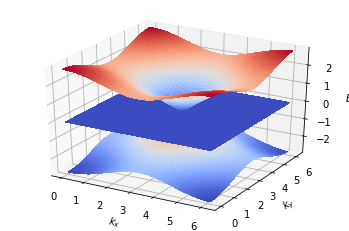

In [24]:
#%matplotlib notebook
from matplotlib import interactive
interactive(True)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('$E$')


surf = ax.plot_surface(X, Y,Zup, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y,Zdw, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y,Zflat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()




In [25]:
dos_data=np.loadtxt("dos.dat")
print (dos_data.shape)


(399, 5)


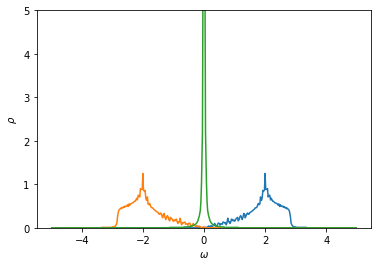

In [26]:
plt.figure()


# Plot the surface.
plt.ylabel(r'$\rho$')
plt.xlabel(r'$\omega$')
plt.ylim(0,5)

plt.plot(dos_data[:,0],dos_data[:,1])
plt.plot(dos_data[:,0],dos_data[:,2])
plt.plot(dos_data[:,0],dos_data[:,3])
plt.show()


In [27]:
entropy_data=np.loadtxt("entropy.dat")
print (entropy_data.shape)

(59, 2)


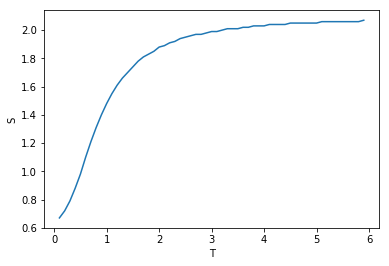

In [30]:
plt.figure()


# Plot the surface.
plt.ylabel('S')
plt.xlabel('T')
#plt.ylim(0,5)

plt.plot(entropy_data[:,0],entropy_data[:,1])

plt.show()